In [137]:
import pandas as pd
import glob

path = r'D:\Code\cs-lib-bitcoin-predictions\omittones\datasets\forex'
all_files = glob.glob(path + "/*.csv")

li = []
for filename in all_files:
    print(f'Reading {filename}')
    df = pd.read_csv(filename, index_col=None, header=0, parse_dates=True)
    df['Gmt time'] = pd.to_datetime(df['Gmt time'], format='%d.%m.%Y %H:%M:%S.%f')
    li.append(df)
frame = pd.concat(li, axis=0, ignore_index=False)
print(f'Read {frame.size} rows.')

Reading D:\Code\cs-lib-bitcoin-predictions\omittones\datasets\forex\EURUSD_Candlestick_1_m_BID_01.01.2005-31.12.2005.csv
Reading D:\Code\cs-lib-bitcoin-predictions\omittones\datasets\forex\EURUSD_Candlestick_1_m_BID_01.01.2006-31.12.2006.csv
Reading D:\Code\cs-lib-bitcoin-predictions\omittones\datasets\forex\EURUSD_Candlestick_1_m_BID_01.01.2007-31.12.2007.csv
Reading D:\Code\cs-lib-bitcoin-predictions\omittones\datasets\forex\EURUSD_Candlestick_1_m_BID_01.01.2008-31.12.2008.csv
Reading D:\Code\cs-lib-bitcoin-predictions\omittones\datasets\forex\EURUSD_Candlestick_1_m_BID_01.01.2009-31.12.2009.csv
Reading D:\Code\cs-lib-bitcoin-predictions\omittones\datasets\forex\EURUSD_Candlestick_1_m_BID_01.01.2010-31.12.2010.csv
Reading D:\Code\cs-lib-bitcoin-predictions\omittones\datasets\forex\EURUSD_Candlestick_1_m_BID_01.01.2011-31.12.2011.csv
Reading D:\Code\cs-lib-bitcoin-predictions\omittones\datasets\forex\EURUSD_Candlestick_1_m_BID_01.01.2012-31.12.2012.csv
Reading D:\Code\cs-lib-bitcoin-p

In [148]:
prices = frame.set_index('Gmt time')
prices = prices['High'].resample('30min').mean()

In [134]:
from datetime import datetime, timedelta

start = datetime(2016, 1, 1)
weekends = [start + timedelta(days=d) for d in range(0, 365)]
weekends = [w for w in weekends if w.weekday() == 5]

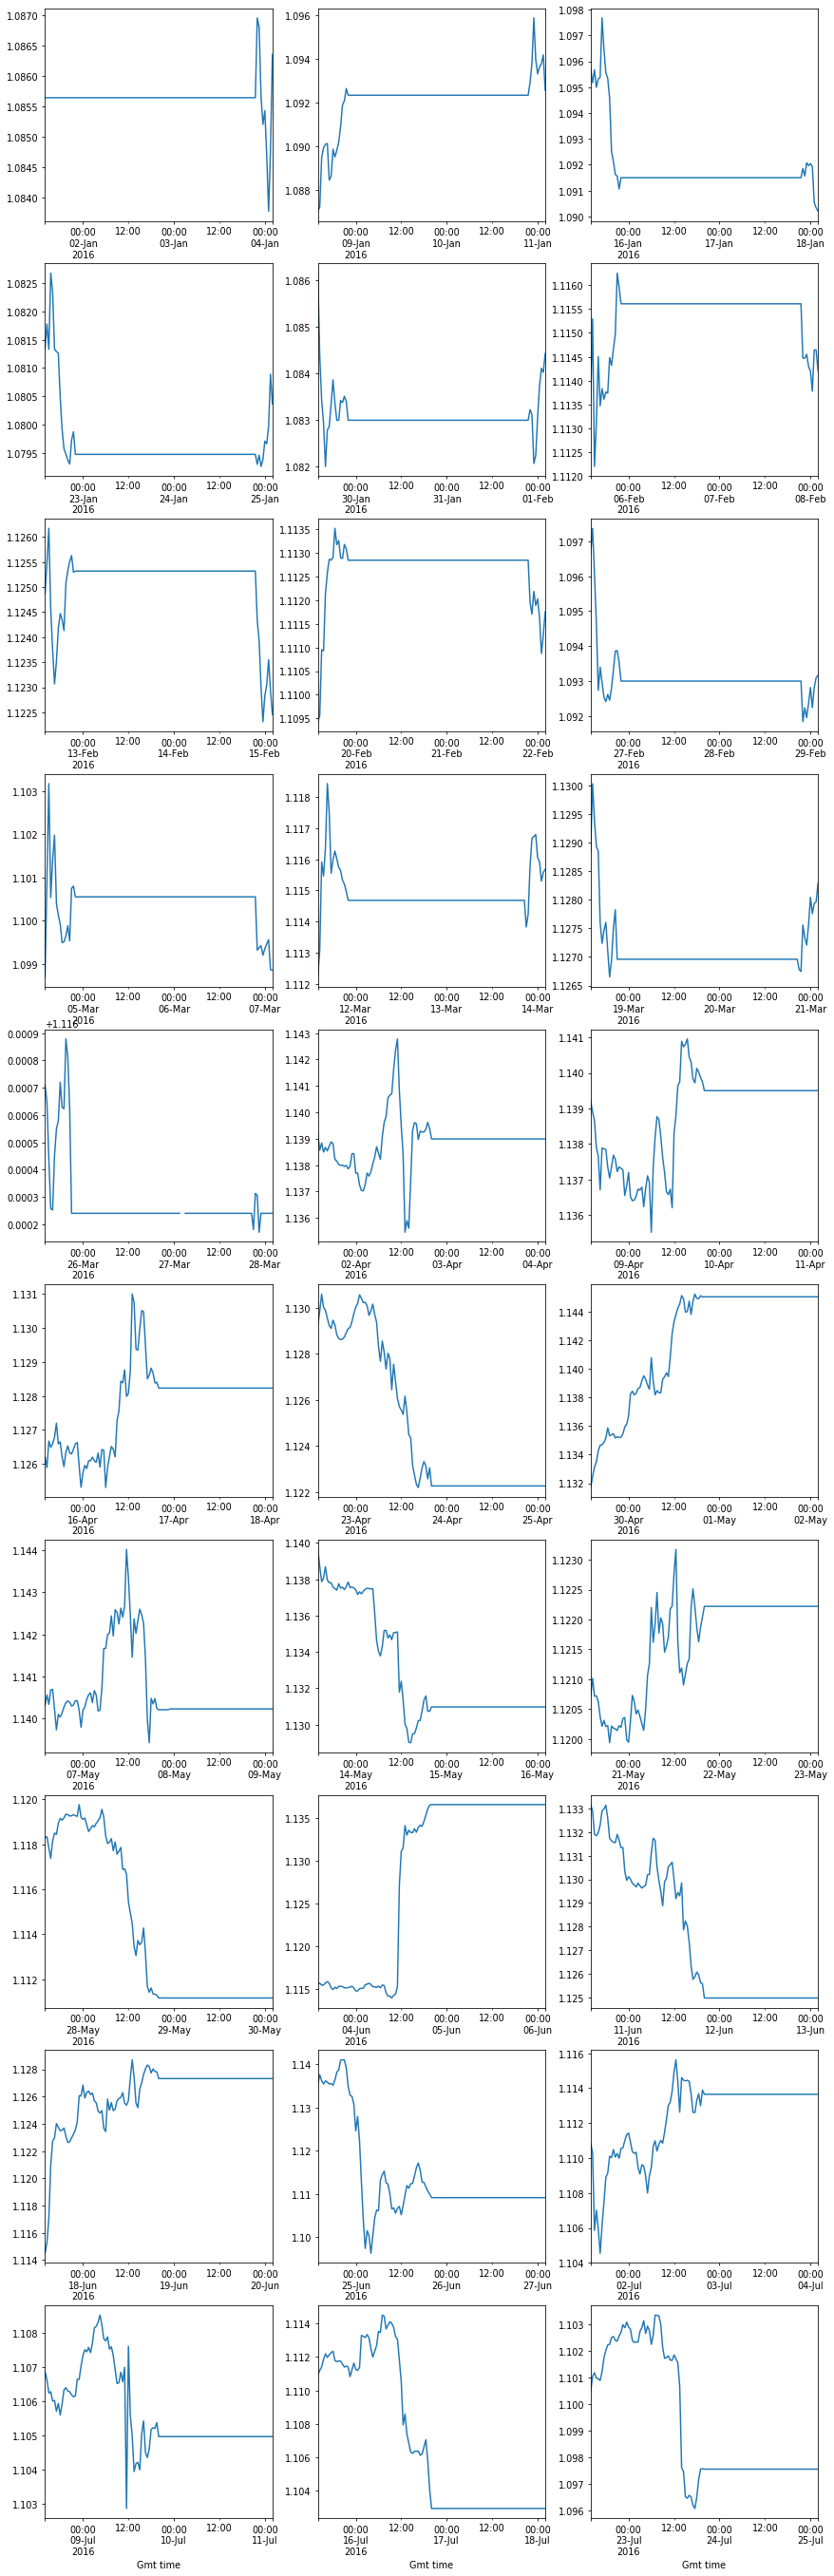

In [153]:
import matplotlib.pyplot as plt

ROWS = 10
COLS = 3

fig = plt.figure(figsize=(COLS * 5, ROWS * 5), dpi=70)
for i, w in enumerate(weekends):
    if i >= ROWS * COLS:
        break
    f = w - timedelta(hours=10)
    t = w + timedelta(hours=50)     
    axes = fig.add_subplot(ROWS, COLS, i + 1)
    display = prices[f : t]
    display.plot(ax = axes)    